In [1]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt

alpha = []
energy = []

# folder = 'results_COBYLA_initial_point'
files = os.listdir()
files_aer = [file for file in files if file.startswith('shots')]

def ordenar_por_numero(nombre_archivo):
    # Obtener el número del nombre del archivo
    numero = int(nombre_archivo.split('=')[1].split('.')[0])
    return numero

files_aer = sorted(files_aer, key=ordenar_por_numero)


for index, archivo_csv in enumerate(files_aer):

    alpha.append([])
    energy.append([])

    with open(os.path.join(archivo_csv), 'r') as file:
        reader = csv.reader(file)
        next(reader)
        for row in reader:
            alpha[index].append(float(row[0]))
            energy[index].append(float(row[1]))
            

files_names = [file.split('.')[0] for file in files_aer]

In [2]:
files_names

['shots=16', 'shots=128', 'shots=1024', 'shots=16384']

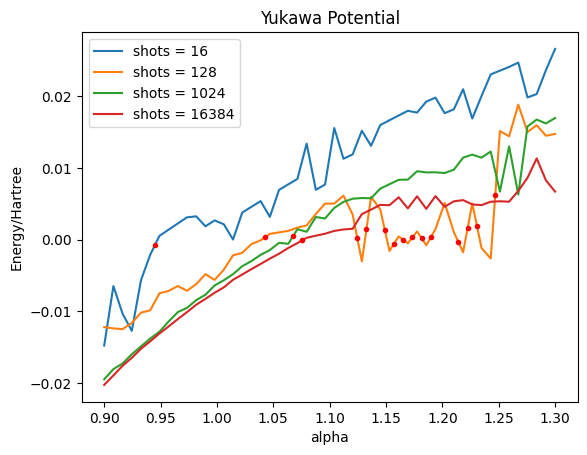

In [4]:
critical_points = []
critical_energies = []

for i in range(len(alpha)):
    critical_points.append([])
    critical_energies.append([])

    plt.plot(alpha[i], energy[i], marker='', linestyle='-', label=f'shots = {files_names[i].split("=")[1]}')

    for j in range(len(alpha[i]) - 1):
        if energy[i][j] * energy[i][j+1] < 0:
            critical_point = 1/2 * (alpha[i][j] + alpha[i][j+1])
            critical_energy = 1/2 * (energy[i][j] + energy[i][j+1])

            critical_points[i].append(critical_point)
            critical_energies[i].append(critical_energy)

            plt.plot(critical_point, critical_energy, marker='.', linestyle='-', color='red')

plt.xlabel('alpha')
plt.ylabel('Energy/Hartree')
plt.title('Yukawa Potential')
plt.legend()
plt.savefig(f'yukawa_critical_point')
plt.show()

In [24]:
critical_points

[[0.9448979591836735],
 [1.042857142857143,
  1.1244897959183673,
  1.1326530612244898,
  1.1489795918367347,
  1.157142857142857,
  1.1653061224489796,
  1.1734693877551021,
  1.1816326530612247,
  1.189795918367347,
  1.2142857142857144,
  1.222448979591837,
  1.230612244897959,
  1.2469387755102042],
 [1.0673469387755103],
 [1.0755102040816327]]

In [38]:
critical_energies

[[-0.0007774055675345759],
 [0.00037250708870796524,
  0.00024777358561261023,
  0.0014786249247455713,
  0.0013326024201229499,
  -0.0005523661661267333,
  -1.8838574418548505e-05,
  0.0003336857944890477,
  0.00019370009937102334,
  0.00036093463139531823,
  -0.00035454025538248727,
  0.0016533306196431499,
  0.0019582590144242955,
  0.006267970097065957],
 [0.0004512411067984683],
 [-0.00010045992586363338]]